In [1]:
import pandas as pd
import numpy as np 
from glob import glob
import cv2
from skimage import io 
from tqdm import tqdm
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer
from tensorflow.keras import layers
import tensorflow.keras.optimizers as Optimizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import (
    Input, Dense, Conv2D, Flatten, Activation, 
    MaxPooling2D, AveragePooling2D, ZeroPadding2D, GlobalAveragePooling2D, GlobalMaxPooling2D, add
)
import pandas as pd
import numpy as np 
from glob import glob
import cv2
from skimage import io 
from tqdm import tqdm
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer
from tensorflow.keras import layers
import tensorflow.keras.optimizers as Optimizer
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input

In [2]:
ground_truth_df = pd.read_csv("ISIC_2019_Training_GroundTruth.csv")
meta_data_df = pd.read_csv("ISIC_2019_Training_Metadata.csv")
ground_truth_df

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data_df= meta_data_df.merge(ground_truth_df, how= 'inner', on='image').sample(frac=1).reset_index(drop=True) #frac keyword speicifies the fraction of rows to return in the random sample so frac =1 meants to retuen all rows in random order
data_df

,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0026472,50.0,NaN,HAM_0004277,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0061324,45.0,upper extremity,BCN_0004931,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0066487,85.0,head/neck,BCN_0003645,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0026266,60.0,upper extremity,HAM_0002436,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000515,NaN,anterior torso,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0063713,55.0,anterior torso,BCN_0002749,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0056126,85.0,lower extremity,BCN_0005080,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25328,ISIC_0073091,50.0,anterior torso,BCN_0003664,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0058153,85.0,head/neck,BCN_0001310,male,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# MobileNet Model 1 - 8 classes

In [4]:
CFG = dict(
        batch_size        =  16,     # 8; 16; 32; 64; bigger batch size => moemry allocation issue
        epochs            =  100,   # 5; 10; 20;
        verbose           =   1,    # 0; 1
        workers           =   4,    # 1; 2; 3

        optimizer         = 'adam', # 'SGD', 'RMSprop'

        RANDOM_STATE      =  123,   
    
        # Path to save a model
        path_model        = '../working/',

        # Images sizes
        img_size          = 224, 
        img_height        = 224, 
        img_width         = 224, 

        # Images augs
        ROTATION          = 180.0,
        ZOOM              =  10.0,
        ZOOM_RANGE        =  [0.9,1.1],
        HZOOM             =  10.0,
        WZOOM             =  10.0,
        HSHIFT            =  10.0,
        WSHIFT            =  10.0,
        SHEAR             =   5.0,
        HFLIP             = True,
        VFLIP             = True,

        # Postprocessing
        label_smooth_fac  =  0.00,  # 0.01; 0.05; 0.1; 0.2;     Label smoothing is used when the loss function is cross entropy, and the model applies the softmax function to the penultimate layer’s logit vectors z to compute its output probabilities p. 
)

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,
    rotation_range            = CFG['ROTATION'],
    zoom_range                = CFG['ZOOM_RANGE'],
    horizontal_flip           = CFG['HFLIP'],
    vertical_flip             = CFG['VFLIP'],
    height_shift_range        = CFG['HSHIFT'],
    width_shift_range         = CFG['WSHIFT'],
    shear_range               = CFG['SHEAR'],
    channel_shift_range       = 0.0,
    brightness_range          = None,
    fill_mode                 = 'nearest',                          
    )

valid_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3)              # no aug for valid
test_generator  = ImageDataGenerator(rescale=1./255)                                    # no aug for test
# Train data
train_generator = train_datagen.flow_from_directory("Image_dir_2",
                                                    subset='training',                  # to read train/valid from same directory 
                                                    target_size=(CFG['img_size'], CFG['img_size']),
                                                    batch_size = CFG['batch_size'],
                                                    class_mode='categorical',
                                                    )

# Validation data
valid_generator = valid_generator.flow_from_directory("Image_dir_2",
                                                     subset='validation',               # to read train/valid from same directory 
                                                     target_size=(CFG['img_size'], CFG['img_size']),
                                                     batch_size = CFG['batch_size'],
                                                     class_mode='categorical'
                                                     ) 
# Test data
test_generator  = test_generator.flow_from_directory("Image_dir_2",
                                                     target_size=(CFG['img_size'], CFG['img_size']),
                                                     batch_size = 1,                    # using 1 to easily manage mapping between test_gen & pred
                                                     class_mode='categorical'
                                                     )

Found 17736 images belonging to 8 classes.
Found 7595 images belonging to 8 classes.
Found 25331 images belonging to 8 classes.


In [21]:
from sklearn.utils import class_weight
from collections import Counter
class_weights= class_weight.compute_class_weight(class_weight= "balanced",
                                    classes= np.unique(train_generator.classes),
                                    y=train_generator.classes)

unique_class_weights = np.unique(train_generator.classes)
class_weights_dict={unique_class_weights[i]: w for i,w in enumerate(class_weights)}

print('\nCLASS WEIGHTS: {}\n'.format(class_weights))
print(np.unique(train_generator.classes))
print(train_generator.classes)
print(unique_class_weights)
print(Counter(train_generator.classes).keys())   # equals to list(set(x))
print(Counter(train_generator.classes).values()) # counts the elements' frequency


CLASS WEIGHTS: [ 3.6523888   0.95272884  1.20685901 13.19642857  0.70025268  0.24597803
  5.03863636 12.45505618]

[0 1 2 3 4 5 6 7]
[0 0 0 ... 7 7 7]
[0 1 2 3 4 5 6 7]
dict_keys([0, 1, 2, 3, 4, 5, 6, 7])
dict_values([607, 2327, 1837, 168, 3166, 9013, 440, 178])


In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import mobilenet_v2

# note we exclude the final dense layers by setting include_top=False,
# and add new ones to train from scratch below
base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3)) 
 
# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False    

# Establish new fully connected block
x = base_model.output
x = Flatten()(x) # flatten from convolution tensor output 
x = Dense(100, activation='relu')(x) # number of layers and units are hyperparameters, as usual
x = Dense(50, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x) # should match # of classes predicted

# define formal model object to train and compile it as usual
model = Model(inputs=base_model.input, outputs=predictions)

In [23]:
model.compile(
    optimizer = CFG['optimizer'],
    loss="categorical_crossentropy",
    metrics =["accuracy"])

In [25]:
#tf.function-decorated function tried to create variables on non-first call'. 
tf.config.run_functions_eagerly(True) # otherwise error

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 10)
cb_checkpointer  = ModelCheckpoint(filepath = CFG['path_model']+'MobileNet-{epoch:02d}-{val_loss:.2f}.hdf5',
                                   monitor  = 'val_loss', 
                                   verbose  = CFG['verbose'], 
                                   save_best_only=True, 
                                   mode='min'
                                  )

callbacks_list = [cb_checkpointer, cb_early_stopper]

history3 = model.fit(train_generator, 
                             epochs=2, 
                             workers=CFG['workers'],
                             validation_data=valid_generator, 
                             callbacks = callbacks_list,
                             class_weight = class_weights_dict
                            )

Epoch 1/2
1109/1109 [==============================] - ETA: 0s - loss: 2.5591 - accuracy: 0.2978
Epoch 00001: val_loss improved from inf to 1.72314, saving model to ../working/MobileNet-01-1.72.hdf5
1109/1109 [==============================] - 4824s 4s/step - loss: 2.5591 - accuracy: 0.2978 - val_loss: 1.7231 - val_accuracy: 0.4111
Epoch 2/2
1109/1109 [==============================] - ETA: 0s - loss: 1.7538 - accuracy: 0.3912
Epoch 00002: val_loss improved from 1.72314 to 1.59056, saving model to ../working/MobileNet-02-1.59.hdf5
1109/1109 [==============================] - 5046s 5s/step - loss: 1.7538 - accuracy: 0.3912 - val_loss: 1.5906 - val_accuracy: 0.4624


# Mobile Net Model 2- 8 classes

In [27]:
CFG2 = dict(
        batch_size        =  32,     # 8; 16; 32; 64; bigger batch size => moemry allocation issue
        epochs            =  100,   # 5; 10; 20;
        verbose           =   1,    # 0; 1
        workers           =   4,    # 1; 2; 3
        optimizer         = 'adam', # 'SGD', 'RMSprop'

        RANDOM_STATE      =  123,   
    
        # Path to save a model
        path_model        = '../working/',

        # Images sizes
        img_size          = 224, 
        img_height        = 224, 
        img_width         = 224, 

        # Images augs
        ROTATION          = 180.0,
        ZOOM              =  10.0,
        ZOOM_RANGE        =  [0.9,1.1],
        HZOOM             =  8.0, #maybe try 8.0?
        WZOOM             =  8.0, #maybe try 8.0?
        HSHIFT            =  8.0, #maybe try 8.0?
        WSHIFT            =  8.0, #maybe try 8.0?
        SHEAR             =   2.0, #maybe try 2.0?
        HFLIP             = True,
        VFLIP             = True,

        # Postprocessing
        label_smooth_fac  =  0.05,  # 0.01; 0.05; 0.1; 0.2;     Label smoothing is used when the loss function is cross entropy, and the model applies the softmax function to the penultimate layer’s logit vectors z to compute its output probabilities p. 
)

#CHANGED ZOOM, SHift, smooth_fac and Batchsize

In [28]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,
    rotation_range            = CFG2['ROTATION'],
    zoom_range                = CFG2['ZOOM_RANGE'],  #is for randomly zooming inside pictures  
    horizontal_flip           = CFG2['HFLIP'], #is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
    vertical_flip             = CFG2['VFLIP'],
    height_shift_range        = CFG2['HSHIFT'],
    width_shift_range         = CFG2['WSHIFT'],
    shear_range               = CFG2['SHEAR'], #randomly applying shearing transformations
    channel_shift_range       = 0.0,
    brightness_range          = None,
    fill_mode                 = 'nearest',      #is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift                     
    )

valid_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3)              # no aug for valid
test_generator  = ImageDataGenerator(rescale=1./255)                                    # no aug for test
# Train data
train_generator = train_datagen.flow_from_directory("Image_dir_2",
                                                    subset='training',                  # to read train/valid from same directory 
                                                    target_size=(CFG2['img_size'], CFG2['img_size']),
                                                    batch_size = CFG2['batch_size'],
                                                    class_mode='categorical',
                                                    )

# Validation data
valid_generator = valid_generator.flow_from_directory("Image_dir_2",
                                                     subset='validation',               # to read train/valid from same directory 
                                                     target_size=(CFG2['img_size'], CFG2['img_size']),
                                                     batch_size = CFG2['batch_size'],
                                                     class_mode='categorical'
                                                     ) 
# Test data
test_generator  = test_generator.flow_from_directory("Image_dir_2",
                                                     target_size=(CFG2['img_size'], CFG2['img_size']),
                                                     batch_size = 1,                    # using 1 to easily manage mapping between test_gen & pred
                                                     class_mode='categorical'
                                                     )

Found 17736 images belonging to 8 classes.
Found 7595 images belonging to 8 classes.
Found 25331 images belonging to 8 classes.


In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import mobilenet_v2

# note we exclude the final dense layers by setting include_top=False,
# and add new ones to train from scratch below
base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3)) 
 
# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False    

# Establish new fully connected block
x = base_model.output
x = Flatten()(x) # flatten from convolution tensor output 
x = Dense(100, activation='relu')(x) # number of layers and units are hyperparameters, as usual
x = Dense(50, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x) # should match # of classes predicted

# define formal model object to train and compile it as usual
model = Model(inputs=base_model.input, outputs=predictions)

In [30]:
model.compile(
    optimizer = CFG2['optimizer'],
    loss="categorical_crossentropy",
    metrics =["accuracy"])

In [32]:
tf.config.run_functions_eagerly(True) # otherwise error

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 10)
cb_checkpointer  = ModelCheckpoint(filepath = CFG2['path_model']+'MobileNet2-{epoch:02d}-{val_loss:.2f}.hdf5',
                                   monitor  = 'val_loss', 
                                   verbose  = CFG2['verbose'], 
                                   save_best_only=True, 
                                   mode='min'
                                  )

callbacks_list = [cb_checkpointer, cb_early_stopper]

history3 = model.fit(train_generator, 
                             epochs=CFG2['epochs'], 
                             workers=CFG2['workers'],
                             validation_data=valid_generator, 
                             callbacks = callbacks_list
                            )

Epoch 1/100
555/555 [==============================] - ETA: 0s - loss: 0.9369 - accuracy: 0.6710
Epoch 00001: val_loss improved from inf to 1.20715, saving model to ../working/MobileNet2-01-1.21.hdf5
555/555 [==============================] - 4758s 9s/step - loss: 0.9369 - accuracy: 0.6710 - val_loss: 1.2072 - val_accuracy: 0.5803
Epoch 2/100
555/555 [==============================] - ETA: 0s - loss: 0.9149 - accuracy: 0.6784
Epoch 00002: val_loss did not improve from 1.20715
555/555 [==============================] - 3911s 7s/step - loss: 0.9149 - accuracy: 0.6784 - val_loss: 1.3548 - val_accuracy: 0.5546
Epoch 3/100
555/555 [==============================] - ETA: 0s - loss: 0.8876 - accuracy: 0.6885
Epoch 00003: val_loss did not improve from 1.20715
555/555 [==============================] - 4875s 9s/step - loss: 0.8876 - accuracy: 0.6885 - val_loss: 1.2092 - val_accuracy: 0.5845
Epoch 4/100
555/555 [==============================] - ETA: 0s - loss: 0.8627 - accuracy: 0.6962
Epoch 00

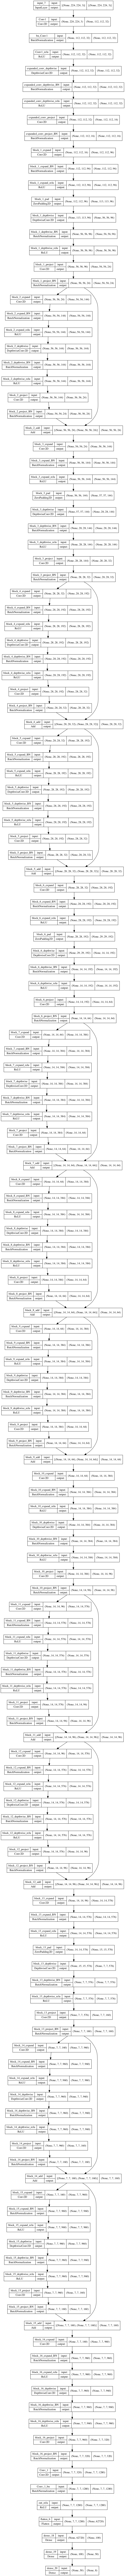

In [33]:
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)


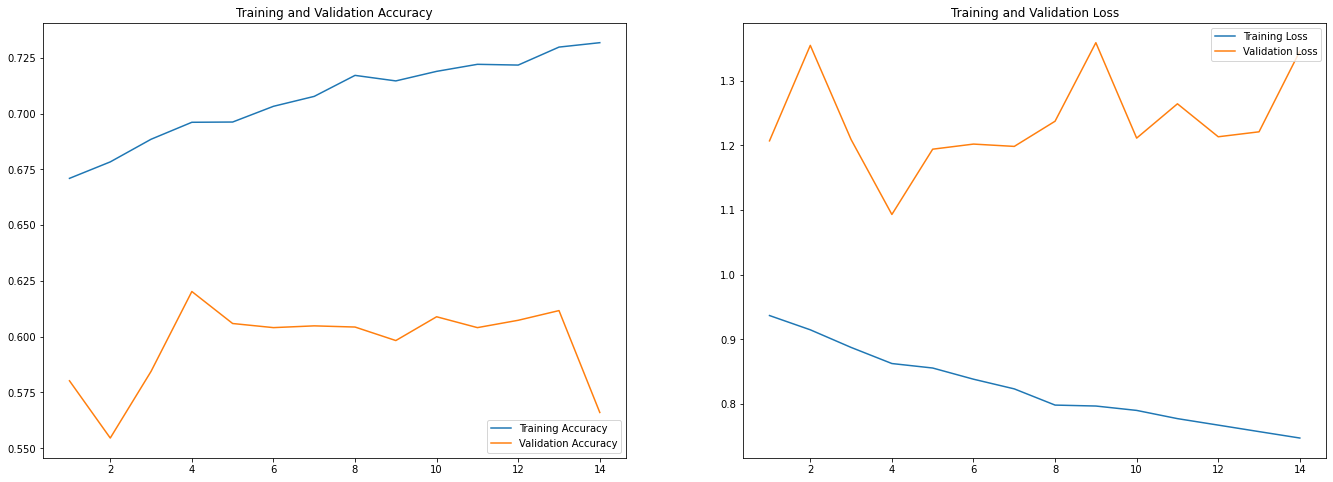

In [41]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

metrics = history3.history['accuracy']
epochs_range = range(1, len(metrics) + 1) 

plt.figure(figsize=(23, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
from sklearn.metrics import classification_report,confusion_matrix
predictions1=model.predict(valid_generator,steps=len(valid_generator))
y=np.argmax(predictions1,axis=1)

print('Classification Report')
cr=classification_report(y_true=valid_generator.classes,y_pred=y,target_names=valid_generator.class_indices)
print(cr)
evaluates=model.evaluate(valid_generator)
print(evaluates)

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Classification Report
              precision    recall  f1-score   support

   AK_images       0.00      0.00      0.00       260
  BCC_images       0.14      0.05      0.07       996
  BKL_images       0.11      0.33      0.17       787
   DF_images       0.00      0.00      0.00        71
  MEL_images       0.19      0.06      0.10      1356
   NV_images       0.51      0.56      0.53      3862
  SCC_images       0.00      0.00      0.00       188
 VASC_images       0.00      0.00      0.00        75

    accuracy                           0.34      7595
   macro avg       0.12      0.13      0.11      7595
weighted avg       0.32      0.34      0.32      7595



/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


238/238 [==============================] - 568s 2s/step - loss: 1.3458 - accuracy: 0.5660
[1.345845341682434, 0.5660302639007568]


Confusion Matrix


<AxesSubplot:>

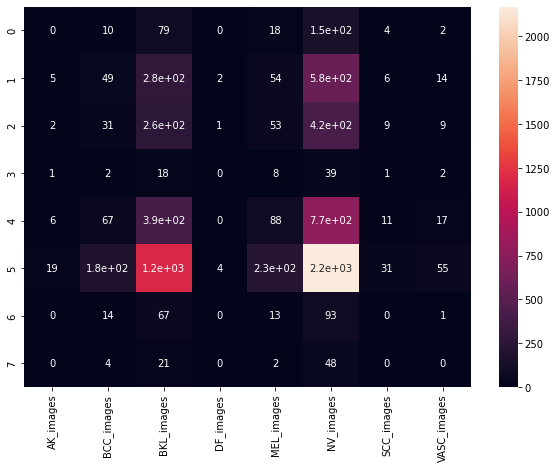

In [64]:
import pandas as pd
import numpy as np
import seaborn as sn
print('Confusion Matrix')
cm = confusion_matrix(valid_generator.classes,y)
df = pd.DataFrame(cm,columns=valid_generator.class_indices)
plt.figure(figsize=(10,7))
sn.heatmap(df,annot=True)

# Mobile Net Model 3

In [65]:
tf.config.run_functions_eagerly(True) # otherwise error

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 10)
cb_checkpointer  = ModelCheckpoint(filepath = CFG2['path_model']+'MobileNet2-{epoch:02d}-{val_loss:.2f}.hdf5',
                                   monitor  = 'val_loss', 
                                   verbose  = CFG2['verbose'], 
                                   save_best_only=True, 
                                   mode='min'
                                  )

callbacks_list = [cb_checkpointer, cb_early_stopper]

history3 = model.fit(train_generator, 
                             epochs=CFG2['epochs'], 
                             workers=CFG2['workers'],
                             validation_data=valid_generator, 
                             callbacks = callbacks_list,
                             class_weight = class_weights_dict
                            )

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
555/555 [==============================] - ETA: 0s - loss: 1.3825 - accuracy: 0.5813 
Epoch 00001: val_loss improved from inf to 1.35780, saving model to ../working/MobileNet2-01-1.36.hdf5
555/555 [==============================] - 6914s 12s/step - loss: 1.3825 - accuracy: 0.5813 - val_loss: 1.3578 - val_accuracy: 0.5430
Epoch 2/100
555/555 [==============================] - ETA: 0s - loss: 1.2214 - accuracy: 0.5983
Epoch 00002: val_loss did not improve from 1.35780
555/555 [==============================] - 4500s 8s/step - loss: 1.2214 - accuracy: 0.5983 - val_loss: 1.5301 - val_accuracy: 0.4907
Epoch 3/100
555/555 [==============================] - ETA: 0s - loss: 1.1495 - accuracy: 0.6058 
Epoch 00003: val_loss did not improve from 1.35780
555/555 [==============================] - 8361s 15s/step - loss: 1.1495 - accuracy: 0.6058 - val_loss: 1.7386 - val_accuracy: 0.4032
Epoch 4/100
555/555 [==============================] - ETA: 0s - loss: 1.1011 - accuracy: 0.6037
Epoc

In [67]:
tf.config.run_functions_eagerly(True) # otherwise error

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 10)
cb_checkpointer  = ModelCheckpoint(filepath = CFG2['path_model']+'MobileNet2-{epoch:02d}-{val_loss:.2f}.hdf5',
                                   monitor  = 'val_loss', 
                                   verbose  = CFG2['verbose'], 
                                   save_best_only=True, 
                                   mode='min'
                                  )

callbacks_list = [cb_checkpointer, cb_early_stopper]

history3 = model.fit(train_generator, 
                             epochs=50, 
                             workers=CFG2['workers'],
                             validation_data=valid_generator, 
                             callbacks = callbacks_list,
                             class_weight = class_weights_dict
                            )

Epoch 1/50
555/555 [==============================] - ETA: 0s - loss: 0.8823 - accuracy: 0.6328 
Epoch 00001: val_loss improved from inf to 1.63638, saving model to ../working/MobileNet2-01-1.64.hdf5
555/555 [==============================] - 6816s 12s/step - loss: 0.8823 - accuracy: 0.6328 - val_loss: 1.6364 - val_accuracy: 0.4762
Epoch 2/50
555/555 [==============================] - ETA: 0s - loss: 0.8481 - accuracy: 0.6376 
Epoch 00002: val_loss improved from 1.63638 to 1.55579, saving model to ../working/MobileNet2-02-1.56.hdf5
555/555 [==============================] - 8049s 14s/step - loss: 0.8481 - accuracy: 0.6376 - val_loss: 1.5558 - val_accuracy: 0.4910
Epoch 3/50
555/555 [==============================] - ETA: 0s - loss: 0.8253 - accuracy: 0.6376 
Epoch 00003: val_loss improved from 1.55579 to 1.45745, saving model to ../working/MobileNet2-03-1.46.hdf5
555/555 [==============================] - 7485s 13s/step - loss: 0.8253 - accuracy: 0.6376 - val_loss: 1.4574 - val_accurac

Epoch 29/50
555/555 [==============================] - ETA: 0s - loss: 0.7179 - accuracy: 0.6705
Epoch 00029: val_loss did not improve from 1.30931
555/555 [==============================] - 3413s 6s/step - loss: 0.7179 - accuracy: 0.6705 - val_loss: 1.6771 - val_accuracy: 0.5147
Epoch 30/50
555/555 [==============================] - ETA: 0s - loss: 0.7694 - accuracy: 0.6719
Epoch 00030: val_loss did not improve from 1.30931
555/555 [==============================] - 3440s 6s/step - loss: 0.7694 - accuracy: 0.6719 - val_loss: 1.7427 - val_accuracy: 0.5065


In [68]:
from sklearn.metrics import classification_report,confusion_matrix
predictions1=model.predict(valid_generator,steps=len(valid_generator))
y=np.argmax(predictions1,axis=1)

print('Classification Report')
cr=classification_report(y_true=valid_generator.classes,y_pred=y,target_names=valid_generator.class_indices)
print(cr)
evaluates=model.evaluate(valid_generator)
print(evaluates)

Classification Report
              precision    recall  f1-score   support

   AK_images       0.02      0.01      0.02       260
  BCC_images       0.16      0.06      0.09       996
  BKL_images       0.10      0.35      0.15       787
   DF_images       0.01      0.03      0.01        71
  MEL_images       0.16      0.05      0.08      1356
   NV_images       0.50      0.44      0.47      3862
  SCC_images       0.02      0.02      0.02       188
 VASC_images       0.01      0.01      0.01        75

    accuracy                           0.28      7595
   macro avg       0.12      0.12      0.11      7595
weighted avg       0.32      0.28      0.28      7595



/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


238/238 [==============================] - 400s 2s/step - loss: 1.7427 - accuracy: 0.5065
[1.742701530456543, 0.5065174698829651]
